# Лабораторная работа 1
# Задача о падении тела. Построение графиков функций

Зарихта Матвей Дмитриевич, 21 февраля 2025

# Задание 1.1. Задача о падении тела

**Описание процесса**.
Тело запущено под углом $\alpha$ к горизонту на высоте $h_{start}$ и через время $t=T$ достигает другое тело, расположенное на расстоянии $s_{end}$ и высоте $h_{end}$.

**Предположения**.
- Тело будем считать материальной точкой массы $m$.
- Движение запущенного тела осуществляется только под действием силы тяжести $${\bf F} = m(0,-g),$$ где $m$ -- масса тела, $g$ -- ускорение свободного падения.
- Сопротивлением среды пренебрегаем.

**Данные**.
- Задача рассматривается при следующих значениях параметров: $h_{start} = 1 m, h_{end} = 3 m, T = 3 s, s_{end} = 5 m$.
- Угол запуска тела $\alpha$ не известен.
- Начальный момент времени движения тела полагаем равным нулю: $t = 0$.
- Значение массы тела $m$ не повлияет на функции перемещения тела.

**Задания для выполнения**.
- $\color{red}\text{Определите}$ функцию перемещения тела $(s_{x}(t), s_{y}(t))$ под действием силы тяжести, где $s_{x}(t)$ и $s_{y}(t)$ -- горизонтальная и вертикальная составляющая положения тела в момент времени $t$, соответственно.
- $\color{red}\text{Найдите}$ угол запуска тела $\alpha$.
- $\color{red}\text{Постройте}$ график траектории движения тела $(s_{x}(t), s_{y}(t))$ для $t \in [0,T]$  

## Выполнение задания 1.1 

### Этап 1. Импортирование модулей

Импортируем модуль `math` с математическими функциями из стандартной библиотеки:

In [13]:
import math

Доступ к инструментам модуля осуществляется с применением синтаксиса
уточнения `<имя модуля>.<имя атрибута>` . Например,

In [16]:
math.sin(math.pi/2)

1.0

Импортируем расширение `numpy` и создадим псевдоним `np` для доступа к
инструментам модуля, не используя имя `numpy`


In [19]:
import numpy as np

Расширение `numpy` основано на работе со структурой данных массив ( `ndarray` ).
Массив ( `ndarray` ) не является встроенным типом данных Python, он является
базовым типом расширения `numpy` .
Импортируем модуль `pyplot` из пакета `matplotlib` для построения графиков.
Для этого примененим синтаксис `<имя пакета>.<имя модуля в пакете>` и
создадим псевдоним имени модуля `plt`

In [22]:
import matplotlib.pyplot as plt

Импортируем модуль `constants` из пакета расширений `scipy` с псевдонимом
`const` . Модуль `constants` предоставляет доступ к значениям физических
констант


In [24]:
import scipy.constants as const

Импортируем модуль `sympy` для символьных вычислений в Python

In [26]:
import sympy

### Этап 2. Cоздание переменных

**Переменные** создаются при первом присваивании им значений. Слева от
оператора присваивания ( $=$ ) записывается переменная, справа — выражение,
результатом вычисления которого является объект: переменная = объект . Имена
переменных рекомендовано задавать в нижнем регистре с использованием знака
нижнего подчеркивания для смыслового разделения имени на части, например
`first_variable = 1` . Объявлять переменные перед их инициализацией не нужно.

После присваивания всякий раз, когда переменная появляется в коде, она
заменяется на объект, на который ссылается. Нельзя использовать переменную,
которой не присвоено значение.


In [29]:
h_start = 1 # вертикальная составляющая положения тела в момент запуска
h_end = 3.0E+0 # вертикальная составляющая положения тела в конечный момент движ
T = 3.0 # время полета
s_end = 5.0e0 # горизонтальное перемещение тела за время полета

Отобразить значение переменной можно, указав ее имя в ячейке ввода в
последней строке или с использованием встроенной функции `print`

In [31]:
h_start # переменная не отобразится
h_end # переменная отобразится

3.0

In [32]:
print(h_start, h_end)

1 3.0


Определим значение ускорения свободного падения для дальнейших расчетов:

In [34]:
g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

$\color{red}\text{Приведите}$ несколько примеров физических констант из модуля
constants пакета расширений `scipy` .

$\color{green}\text{Ответ:}$ 
- Скорость света в вакууме (`from scipy.constants import c`)
- Постоянная Планка (`from scipy.constants import h`)
- Постоянная Авогадро (`from scipy.constants import N_A`)
- Гравитационная постоянная (`from scipy.constants import G`)

Временной отрезок $[0, T]$ представим в виде последовательности чисел. Cоздадим
последовательность равномерно распределенных чисел на отрезке $[0, T]$ с шагом $0.01$
 двумя способами: на основе встроенного типа список ( `list` ) и на основе
массива ( `ndarray` ) из расширения `numpy`

In [38]:
step = 0.01
t_list = [0 + i*step for i in range(int(T/0.01))]
t_array = np.arange(0,T,step)

$\color{red}\text{Сформулируйте}$ спецификации функций `range` и `arange` , приведите примеры.

In [40]:
?range

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
Subclasses:     

In [41]:
?np.arange

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

``arange`` can be called with a varying number of positional arguments:

* ``arange(stop)``: Values are generated within the half-open interval
  ``[0, stop)`` (in other words, the interval including `start` but
  excluding `stop`).
* ``arange(start, stop)``: Values are generated within the half-open
  interval ``[start, stop)``.
* ``arange(start, stop, step)`` Values are generated within the half-open
  interval ``[start, stop)``, with spacing between values given by
  ``step``.

For integer arguments the function is roughly equivalent to the Python
built-in :py:class:`range`, but returns an ndarray rather than a ``range``
instance.

When using a non-integer step, such as 0.1, it is often better to use
`numpy.linspace`.

See the Warning sections below for more information.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interva

$\color{green}\text{Ответ:}$ 

**Функция** `range(start, stop, step)` создает неизменяемую последовательность, состоящую из элементов типа $int$ .
Первый элемент - *start*, последний - *stop*, шаг между элементами - *step* . Функцию можно записать в виде `range(stop)` . Тогда *start* по умолчанию равен 0, а *step* - 1.

$\color{purple}\text{Примеры:}$

- `range(2, 5)` создает последовательность от 2 до 5 с шагом 1.
- `range(2, 5, 2)` создает последовательность от 2 до 5 с шагом 2.

**Функция** `arange(start, stop, step, dtype)` создает массив, однако *type* позволяет указывать тип данных массива. Также в отличие от `range` занимает память, но позволяет гибко работать со своими элементами. Не является встроенным в базовый Python.

$\color{purple}\text{Примеры:}$

- `np.arange(0, 1, 0.1)` создает последовательность от 0 до 1 с дробным шагом = 0.1
- `np.arange(5)` создает последовательность от 0 до 5 с шагом 1.

*Запомните*, что после создания списка ( `list` ) его размер изменить можно, после
создания массива ( `ndarray` ) его размер изменить нельзя.

### Этап 3. Определение функции перемещения и нахождение угла запуска тела


Полагаем, что начало прямоугольной декартовой системы координат соответствует
уровню земли. Тогда в начальный момент движения тела $t = 0$ имеем, что $$s_{x}(0) = 0, s_{y}(0) = h_{start}.$$ 

Для построения функции перемещения $(s_{x}(t) , s_{y}(t) )$ воспользуемся вторым
законом Ньютона $$ma = F,$$ где $m$ -- масса тела, ускорение движения тела $a = (s^n_{x}(t), s^n_{y}(t))$ и приложенная
сила $F = m(0,-g)$. В результате имеем два уравнения, что $$s^n_{x}(t) = 0, s^n_{y}(t) = -g.$$ На основании уравнений с учетом начальных условий можно записать
аналитический вид для функций $s_{x}(t)$ и $s_{y}(t)$ $$s_{x}(t) = s_{x}(0) + v0_{x}t = 0 + v0_{x}t,$$ $$s_{y}(t) = s_{y}(0) + v0_{y}t = 0 + v0_{x}t - \frac{g}{2}t^2 = h_{start} + v0_{y}t - \frac{g}{2}t^2,$$ где $v0 = (v0_{x}, v0_{y})$ обозначает неизвестную скорость движения тела в начальный момент времени $t = 0$.


$\color{red}\text{Напишите}$ подробно, как из второго закона Ньютона и начальных
условий получен аналитический вид функции перемещения $s_{x}(t), s_{y}(t)$.
Объяснения оформите в тексте документа с лабораторной работой.

$\color{green}\text{Ответ: }$ Тело, брошенное под углом к горизонту движется по двум осям: горизонтальной $( x )$ и вертикальной $( y )$.

- **Горизонтальная ось**:  ускорение отсутствует => скорость постоянна. Из формулы горизонтального перемещения $x(t) = x_{0} + v0_{x}t + \frac{a}{2}*t^2$ (как сказано выше, ускорение отсутствует, а начальную точку принимаем за 0), остается $x(t) = v0_{x}t$ , где $x(t)$ - конечная координата (расстояние), а $v0_{x}$ и $t$ - начальная скорость и время движения тела соответственно.

- **Вертикальная ось**: здесь присутствует ускорение свободного падения => скорость по вертикали изменяется. Т.к. укорение свободного падения действует вниз, а тело было брошено под положительным углом к горизонту => начальная скорость $v0_{y}$ будет положительной, а ускорение $g$ будет отрицательным, и после остановки в своей максимальной точке, тело будет набирать скорость уже в противоположном направлении, относительно направления оси $O_{y}$. Из формулы горизонтального перемещения, представленной выше, заменив символ $x$ на $y$ и поменяв знак у ускорения, при условии, что нам дана координата $y_{0} = h_{start}$ , получим формулу, которая имеет вид: $s_{y}(t) = s_{y}(0) + v0_{y}t = 0 + v0_{x}t - \frac{g}{2}t^2 = h_{start} + v0_{y}t - \frac{g}{2}t^2$


$\color{red}\text{Задание* необязательное}$: как изменится вид функций
перемещения, если начальный момент времени будет равен не $t = 0$, a $t = t^*$ ?

$\color{green}\text{Ответ}$: т.к. никакие параметры, кроме начального времени не были изменены, в формуле стоит поменять только параметр $t$:

- **Для горизонтальной оси** формула примет вид $s_{x}(t) = v0_{x}(t-t^*)$.
- **Для вертикальной оси** формула примет вид $s_{y}(t) = s_{y}(0) + v0_{y}(t-t^*) = 0 + v0_{x}(t-t^*) - \frac{g}{2}(t-t^*)^2 = h_{start} + v0_{y}(t-t^*) - \frac{g}{2}(t-t^*)^2$.

Из условия задачи имеем, что $s_{y}(T) = h_{end}$. Из этого соотношения находим
значение для $v0_{y}$

In [52]:
v0_y = (h_end-h_start+g/2*T**2)/T
v0_y

15.376641666666666

In [53]:
v0_x = s_end/T
v0_x

1.6666666666666667

Значение угла запуска тела $\alpha$ определяем из соотношения $\tan\alpha = \frac{v0_{y}}{v0_{x}}$

In [55]:
alpha = math.atan(v0_y/v0_x)
alpha, math.degrees(alpha)

(1.462828312588189, 83.81388846354714)

Результирующая функция перемещения имеет следующий вид

In [57]:
f's_x(t) = {v0_x} t'

's_x(t) = 1.6666666666666667 t'

In [58]:
f's_y(t) = {h_start} + {v0_y:.6} t - {g:.6}/2*t\N{superscript two}'

's_y(t) = 1 + 15.3766 t - 9.80665/2*t²'

### Этап 4. Построение графика траектории движения тела

Построение графиков функций осуществляется по координатам точек графика. Для
этого нужно создать последовательность значений _x_-координат точек графика функции и последовательность соответствующих значений _y_-координат точек
графика функции.

На Этапе 2 было создано две последовательности равномерно распределенных
чисел на отрезке $[0, T]$ с шагом 0.01 для переменной времени $t$

In [61]:
t_list, t_array; # символ ; в конце выражения предотвращает вывод результата.

Определим списки чисел, соответствующие горизонтальным и вертикальным
составляющим положения тела в моменты времени `t_list` с использованием
формул, полученных на Этапе 3:


In [64]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start+v0_y*t-g*t**2/2 for t in t_list]

Определим массивы чисел, соответствующие горизонтальным и вертикальным
составляющим положения тела в момент времени `t_array` :

In [70]:
s_x_array = v0_x*t_array
s_y_array = h_start+v0_y*t_array-g*t_array**2/2

*Обратите внимание*, что арифметические действия (+, -, *, /, **) с массивами
`ndarray` выполняются **поэлементно** без использования дополнительного
синтаксиса.

Строим график траектории движения тела, используя инструменты модуля pyplot
пакета matplotlib . Смотрите **Help | Matplotlib Reference** для справочной
информации по используемым функциям: `figure` , `plot` , `title` , `xlabel` ,
`ylabel` , `axis` , `xlim` , `ylim` .

(0.0, 5.0, 0.0, 14.0)

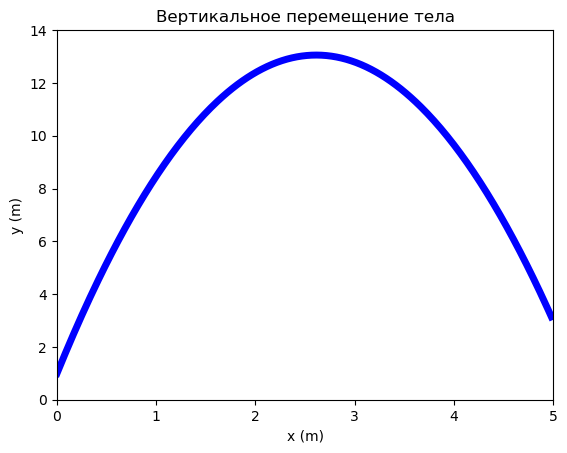

In [75]:
plt.figure()
plt.plot(s_x_list,s_y_list,'b-',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)') # символ ; позволяет записывать несколь
plt.axis([0, s_end, 0, h_end+11])

При вызове функции `plot` из `pyplot` можно использовать как списки, так и
массивы.


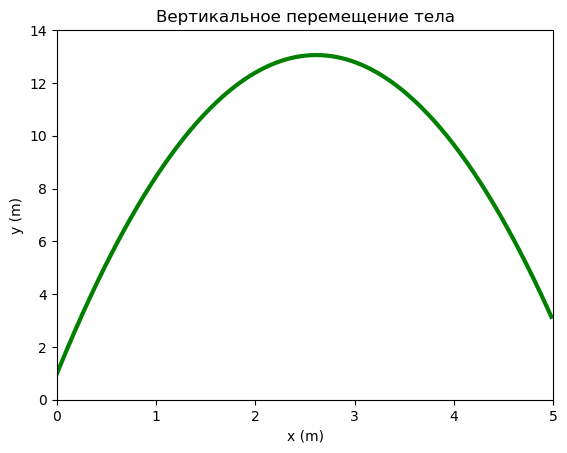

In [77]:
plt.figure()
plt.plot(s_x_array,s_y_array,color='green',lw=3)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
# альтернативный синтаксис для установки пределов по осям
plt.xlim(0, s_end)
plt.ylim(0, h_end+11);

# Задание 1.2. Определение момента времени касания телом земли

Для задачи о падении тела из Задания 1.1 \color{red}\text{найдите} момент времени касания телом
земли (время нахождения тела в воздухе).

Выполнение задания осуществите на основе двух подходов.

*Подход 1* (**точное решение**): время касания телом земли находим как точное
решение уравнения $s_{y}(t) = 0$;

*Подход 2* (**приближенное решение**)

- Постройте последовательность $s_{y}$ на временном отрезке $[0, t_{stop}]$, чтобы
момент касания тела земли $t^*$ попадал в выбранный отрезок, т.е. $t^* \in [0, t_{stop}]$.
Отметим, что $t_{stop} > T$, где значение $T$ задается в Задании 1.1.
- Найдите в построенной последовательности $s_{y}$ два соседних элемента
последовательности, значения которых меняют знак. Т. е. найдите значение
индекса *k*, для которого $s_{y}[k]s_{y}[k+1] < 0$. Это будет означать, что $0 \in (s_{y}[k]s_{y}[k+1])$.
- Постройте прямую линию $s_{lin}(t)$, проходящую через две точки $(t[k], s_{y}[k])$ и $(t[k+1], s_{y}[k+1])$ и найдите значение $t^* \in (t[k],t[k+1])$ из условия $s_{lin}(t^*) = 0$. Найденное значение $t^*$, будет соответствовать точке $(t^*, 0)$ на прямой $s_{lin}(t)$. $\color{red}\text{Приведите}$ в документе формулы для прямой $s_{lin}(t)$ и для вычисления $(t^*)$.
$\color{red}\text{Сравните}$ точное решение (*Подход 1*) и приближенное решение (*Подход 2*), вычислив относительную ошибку.

## Выполнение Задания 1.2

Рассмотрим *Подход 1* выполнения Задания 1.2.

Для решения алгебраического уравнения $s_{y}(t) = 0$ воспользуемся функцией
`solve` из модуля `sympy` , которая предназначена для решения алгебраических
уравнений и систем уравнений. Для выполнения функции `solve` предварительно с
помощью функции `symbols` необходимо создать **символьную переменную**,
относительно которой будет определено уравнение.

In [82]:
t = sympy.symbols('t')
result = sympy.solve(h_start+v0_y*t-g*t**2/2, t)
result

[-0.0637382309488101, 3.19970039267921]

In [88]:
t_star_exact = result[-1]
t_star_exact

3.19970039267921

$\color{red}\text{Сформулируйте}$ спецификации функций `symbols` и `solve` из
модуля `sympy`. $\color{red}\text{ Приведите}$ два собственных примера решения
алгебраических уравнений.

In [91]:
?sympy.solve

Signature: sympy.solve(f, *symbols, **flags)
Docstring:
Algebraically solves equations and systems of equations.

Explanation

Currently supported:
    - polynomial
    - transcendental
    - piecewise combinations of the above
    - systems of linear and polynomial equations
    - systems containing relational expressions
    - systems implied by undetermined coefficients

Examples

The default output varies according to the input and might
be a list (possibly empty), a dictionary, a list of
dictionaries or tuples, or an expression involving relationals.
For specifics regarding different forms of output that may appear, see :ref:`solve_output`.
Let it suffice here to say that to obtain a uniform output from
`solve` use ``dict=True`` or ``set=True`` (see below).

    >>> from sympy import solve, Poly, Eq, Matrix, Symbol
    >>> from sympy.abc import x, y, z, a, b

The expressions that are passed can be Expr, Equality, or Poly
classes (or lists of the same); a Matrix is considered to be

$\color{green}\text{Ответ}$: 

- **Функция `symbols`** создает символьные переменные для использования их в математических выражениях. Данная функция имеет форму записи `sympy.symbols(names, sv)`,где **names** -- имена переменных, а **sv** -- свойства переменных (их параметры).
- **Функция `solve`** решает уравнения или системы уравнений. Имеет форму записи `sympy.solve(uravn, perem, sv)`, где **uravn** -- уравнение или система уравнений, **perem** -- переменные, относительно которых решается уравнение; **sv** -- дополнительные параметры.

#### $\color{green}\text{Примеры}$: 

In [95]:
x = sympy.symbols('x')
print(sympy.solve(x**2 - x - 6, x))

[-2, 3]


In [96]:
x, y = sympy.symbols('x y')
print(sympy.solve((x + y - 5, 2*x - y - 1),(x,y)))

{x: 2, y: 3}


$\color{red}\text{Выполните}$ Задание 1.2 на основе _Подхода 2_:

- для поиска индекса *k*, для которого $s_{y}[k]s_{y}[k+1] < 0$, используйте цикл for
по последовательности $s_{y}$ в сочетании с `enumerate` ;
- для вычисления $t^*$ используйте построенную формулу.


In [98]:
for k, (sk, sk1) in enumerate(zip(s_y_array[:-1], s_y_array[1:])):
    if sk * sk1 < 0:
        break
tk = t_array[k]
tk1 = t_array[k+1]
sk = s_y_array[k]
sk1 = s_y_array[k+1]

a = (sk1 - sk) / (tk1 - tk)
b = sk - a * tk

print("t* =", -b / a)

t* = 3.215956794761942


# Задание 1.3. Построение секущей, касательной и нормали к графику функции

$\color{red}\text{Постройте}$ в одной графической области:

- график траектории движения тела ($s_{x}(t), s_{y}(t)$) для $t \in [0, T]$ из Задания 1.1;
- график секущей прямой к траектории движения тела, проходящей через
начальную точку при $t = 0$ и конечную точку при $t = T$ ;
- график нормальной прямой к траектории движения тела в начальной точке
при $t = 0$.

Построение графиков функций осуществляется по координатам точек графика. Для
построения графиков прямых линий (секущая, касательная, нормаль) используйте
только две точки.

## Выполнение Задания 1.3

Подготовим необходимые данные для построения секущей прямой к траектории
движения тела.

Воспользуемся векторно-параметрическим уравнением прямой для заданной
точки $p_{start}$, лежащей на прямой, и заданного направляющего вектора $\alpha$ $$p(t) = p_{start} + \alpha t.$$
Направляющий вектор можно определить как $\alpha = p_{end} - p_{start}$, где точка $p_{end}$ лежит на прямой и отлична от точки $p_{start}$.

Введем новые переменные для описания начальной точки $p_{start}$ и конечной точки $p_{end}$ через их координаты. Для новых переменных используем тип массив
( `ndarray` ) из `numpy` . Представление координат точек в виде массивов иногда
эффективнее, чем представление в виде списков, для дальнейшей работы с
координатами.

In [104]:
p_start = np.array([s_x_array[0],s_y_array[0]])
p_end = np.array([s_x_array[-1],s_y_array[-1]])
p_start, p_end

(array([0., 1.]), array([4.98333333, 3.13994275]))

Вычислим направляющий вектор:

In [106]:
a = p_end-p_start

Для построения графика прямой достаточно задания двух точек, лежащих на
прямой:

In [108]:
p = [p_start + a*t for t in [-1, 2]]
p = np.array(p)

Построим график траектории движения тела и график секущей прямой в одной
графической области:

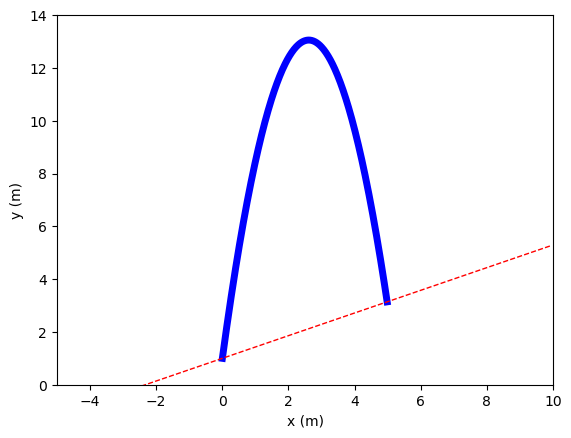

In [110]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1) # обратите внимание не специальную
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11]); 

$\color{red}\text{Постройте}$ график касательной прямой к траектории движения
тела в одной графической области с траекторией движения и секущей прямой. Для
построения касательной прямой воспользуйтесь уравнением прямой по точке
$p_{start}(x_{start},y_{start})$ и угловому коэффициенту *k*: $$y = k(x- x_{start}) + y_{start}.$$

In [112]:
k = (s_y_array[1] - s_y_array[0]) / (s_x_array[1] - s_x_array[0])
print(k)

9.19656504999999


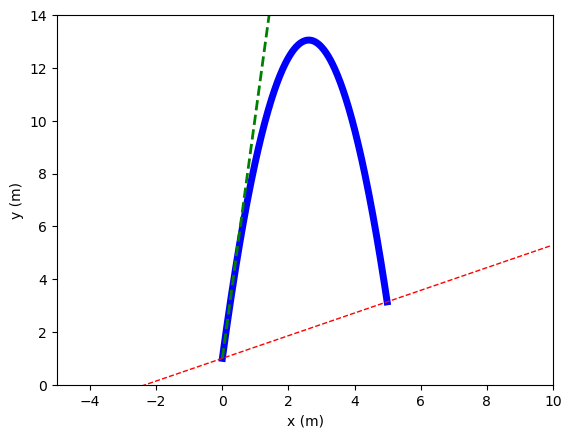

In [113]:
y_kas = k * (s_x_array - s_x_array[0]) + s_y_array[0]
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'blue',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1)
plt.plot(s_x_array, y_kas,  '--', color = 'green', lw=2)
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11]); 

$\color{red}\text{Поясните}$  в документе, как Вы определяете угловой коэффициент *k*.

$\color{green}\text{Ответ}$: Производную от функции, имея 2 массива со значениями $x$ и $y$, можно достаточно точно вычислить по формуле $k = \frac{y_{i+1} - y_{i}}{x_{i+1} - x_{i}}$

$\color{red}\text{Сформулируйте}$ в документе уравнение нормальной прямой к
траектории движения тела в момент времени $t = 0$, используя свойство
перпендикуляртности каксательной и нормальной прямых.

$\color{green}\text{Ответ}:$ уравнение нормали к траектории полета тела в точке $t$ будет иметь тот же вид, что и график касательной в этой точке, за исключением того, что по свойству перпендикулятности прямых коэф. $k$ будет равнен $-1/k$. Тогда уравнение нормали примет вид: $$y = k1(x- x_{start}) + y_{start},$$ где $k1 = -1/k$.

$\color{red}\text{Постройте}$ график нормальной прямой к траектории движения
тела в момент времени $t = 0$ в одной графической области с траекторией
движения, секущей прямой и касательной прямой.


In [118]:
k1= -1/k
y_norm = k1 * (s_x_array - s_x_array[0]) + s_y_array[0]

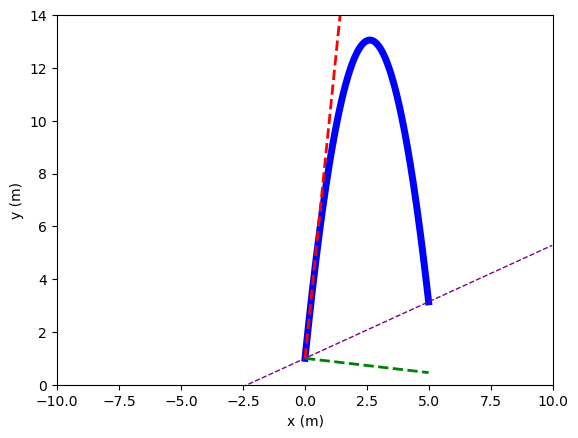

In [120]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(s_x_array, y_kas,  '--', color = 'red', lw=2)
plt.plot(p[:,0],p[:,1],'--',color='purple',lw=1)
plt.plot(s_x_array, y_norm,'--',color='green',lw=2)
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-10, s_end+5, 0, h_end+11]); 

# Задание 1.4. Построение графиков функций, (Вариант 4)

$\color{red}\text{Постройте}$ графики функций на плоскости по координатам точек
согласно варианту. Функция задана:

a) полярным уравнением $\rho = \rho(\phi)$ в полярной системе координат $(\phi, \rho)$;

b) параметрическими уравнениями $x = x(t), y = y(t)$ в декартовой системе координат $(x,y)$.

Построение графиков функций осуществляется по координатам точек графика. Для
этого нужно создать последовательность значений $x(\phi)$-координат точек графика
функции и последовательность соответствующих значений $y(\phi)$-координат точек
графика функции.


a) $\rho = \alpha sin(2k\phi) , \alpha \in \mathbb{R},  k \in \mathbb{N}$

b) $x = ln(t + \sqrt{t^2 +1})$, $y = t\sqrt{t^2 +1}$

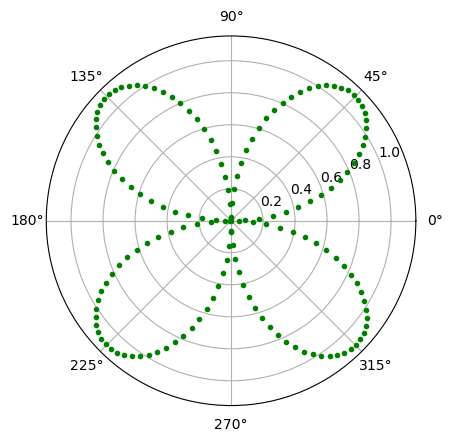

In [162]:
k =1
a = 1.1
phi = np.arange(0, np.pi*2, 0.04)
plt.figure()
plt.axes(projection='polar')
r = a*np.sin(2*k*phi)
plt.plot(phi + (r<0)*np.pi,abs(r),'g.');

In [125]:
t_param = np.arange(-5, 5, 0.1)
x = np.log(t_param + np.sqrt(t_param**2 + 1))
y = t_param * np.sqrt(t_param**2 + 1)

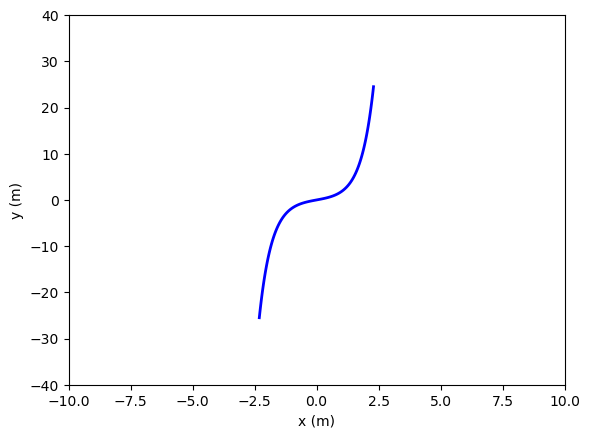

In [126]:
plt.figure()
plt.plot(x,y,'b-',lw=2)
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-10, s_end+5, -40, 40]); 